# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.

In [39]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/college_completion.csv")

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [3]:
#DIMENSIONS of the dataframe
df.shape

(3798, 63)

In [4]:
#variables included:
df.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [5]:
#examing first rows of the data frame
df.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


*The dimensions of the data are 3798 x 63. There are 3798 observation and 63 variables. The 63 variables are also printed above.*

3. Cross tabulate `control` and `level`. Describe the patterns you see.

In [6]:
control = df['control']
level = df['level']

pd.crosstab(control, level)

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


*Patterns seen are: private for-profit institutions tend to offer a balenced mix of both 2-year and 4-year programs, private not-for-profit institutions predominantly focus on 4-year degrees, and public institutions are more inclined to offer 2-year programs but it is not as dominant as 4-year porograms in private not-for-profit institutions.*

4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


<Axes: xlabel='grad_100_value', ylabel='Count'>

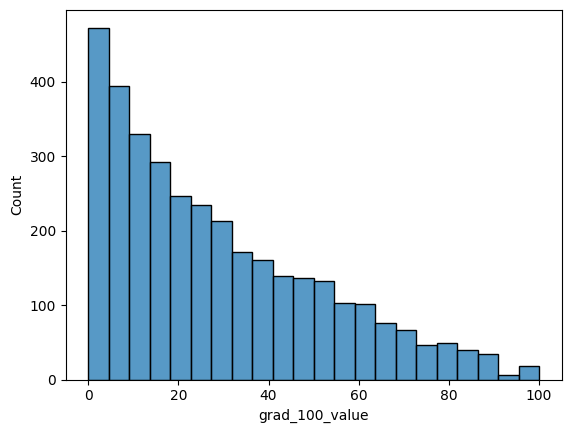

In [7]:
import seaborn as sns

#creating histogram
var = 'grad_100_value'
sns.histplot(df[var])


<Axes: xlabel='grad_100_value', ylabel='Density'>

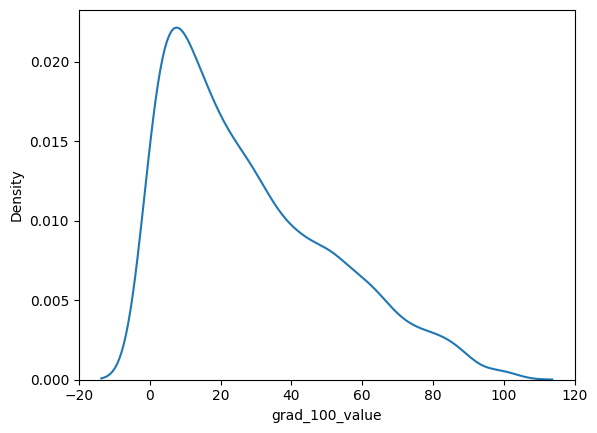

In [8]:
#kernel density plot
sns.kdeplot(df[var])

<Axes: ylabel='grad_100_value'>

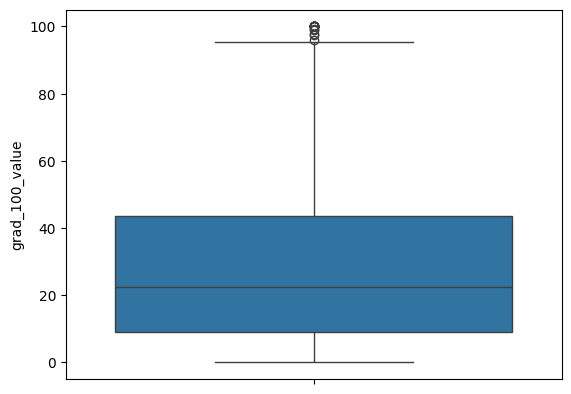

In [9]:
#boxplot
sns.boxplot(df[var])

In [10]:
#statistical description
df[var].describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?


<Axes: xlabel='grad_100_value', ylabel='Density'>

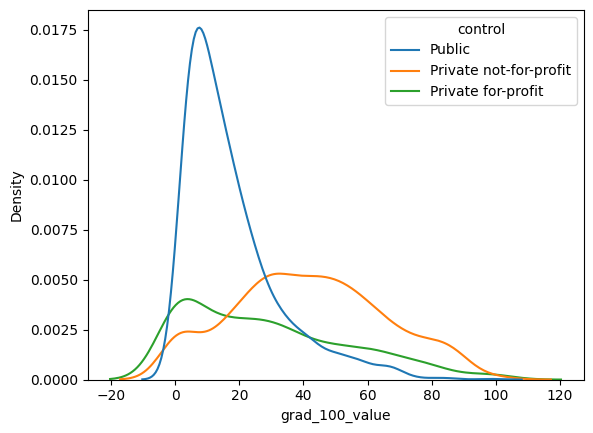

In [11]:
#kernel density plot by control
sns.kdeplot(data=df, x=var, hue=control)


<Axes: xlabel='grad_100_value', ylabel='Density'>

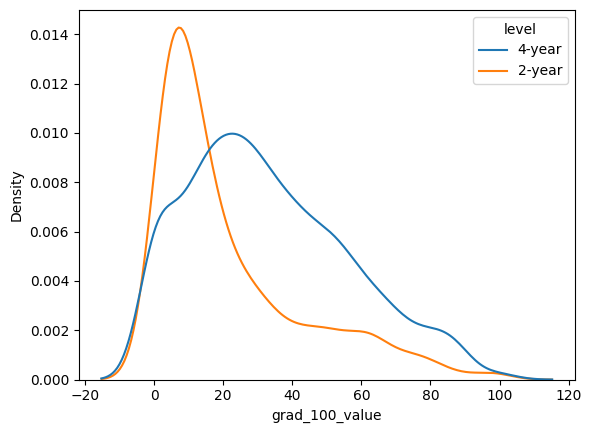

In [12]:
#kernel density plot by level
sns.kdeplot(data=df, x=var, hue=level)

In [13]:
#Grouped calculations by level
group = 'level'

df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

In [14]:
#Grouped calculations by control
group = 'control'

df.loc[:,[group,var]].groupby(group).describe()

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

*Private not-for-profit institutions have the highest average graduation rates at 42%, outperforming private for-profit and public institutions, which average 29% and 17%. The kernel density plots and statistical data confirm that 4-year programs generally yield higher graduation rates than 2-year programs.*

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?


<Axes: xlabel='grad_100_value', ylabel='Density'>

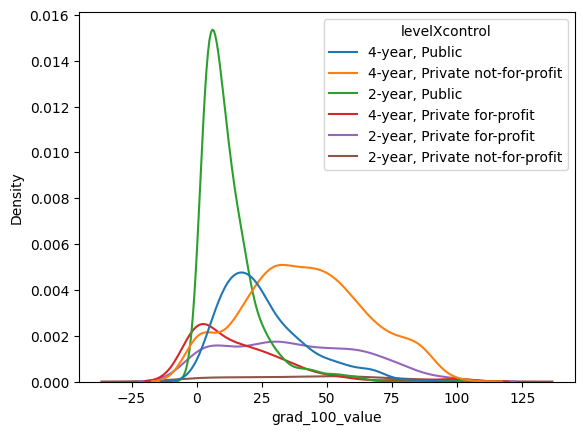

In [15]:
df['levelXcontrol']=df['level']+', '+df['control']

#Grouped kernel density plot for levelxcontrol
sns.kdeplot(data=df, x=var, hue=df['levelXcontrol'])

*4-year, private not-for-profit institutions have the best graduation rates. This is indicated by the peak and distribution of their curve being positioned further to the right, which suggests a higher density of institutions with higher graduation rates in that category.*

7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.


<Axes: xlabel='aid_value', ylabel='Density'>

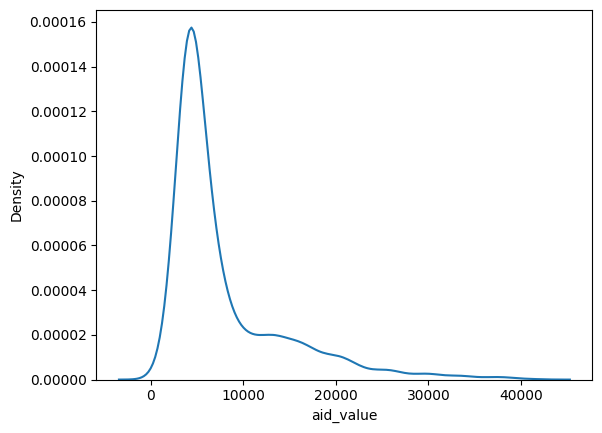

In [16]:
var = 'aid_value'

#kernel density plot of aid_value
sns.kdeplot(data=df, x=var)

<Axes: xlabel='aid_value', ylabel='Density'>

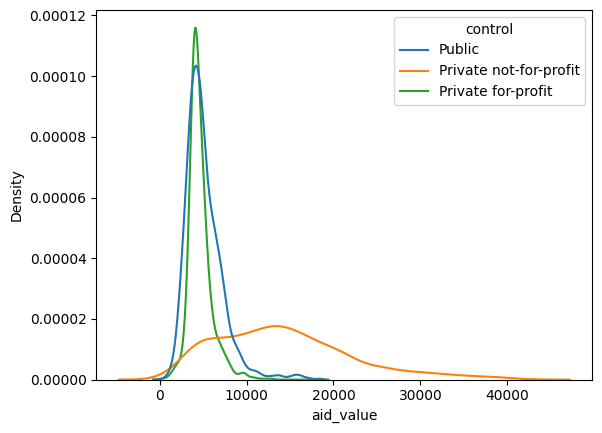

In [17]:
group = 'control'

#kernel density plot of aid_value with grouping by control
sns.kdeplot(data=df, x=var, hue=group)

<Axes: xlabel='aid_value', ylabel='Density'>

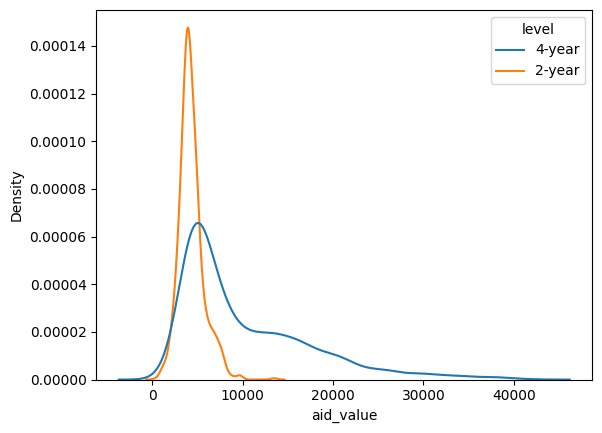

In [18]:
group = 'level'

#kernel density plot of aid_value with grouping by level
sns.kdeplot(data=df, x=var, hue=group)

<Axes: xlabel='aid_value_arcsinh', ylabel='Density'>

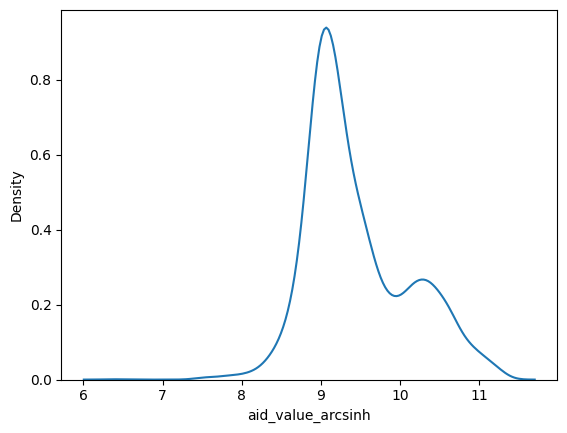

In [19]:
#using arcsin on aid_value to reveal additional features of the distribution and to scale the data for visualization as it is currently skewed
df['aid_value_arcsinh'] = np.arcsinh(df['aid_value'])

var = 'aid_value_arcsinh'

#kernel density plot of aid_value_arcsinh
sns.kdeplot(data=df, x=var)

In [20]:
var = 'aid_value'
group = 'level'

#grouped calculation by level
df.loc[:,[group,var]].groupby(group).describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [21]:
var = 'aid_value'
group = 'control'

#grouped calculation by control
df.loc[:,[group,var]].groupby(group).describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

*The kernel density plots for aid_value reveal a wide distribution for 4-year and private not-for-profit institutions, reflecting higher average aid amounts and greater variability compared to 2-year and public or for-profit institutions. Private not-for-profits have the highest average aid at $14,180, with a broad range indicating diverse aid packages. The arcsinh transformation of aid_value mitigates skewness, highlighting distinct subgroups within the data. These plots and statistics together suggest that private not-for-profit, 4-year institutions tend to offer more aid, with a wider dispersion in the amounts granted*

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

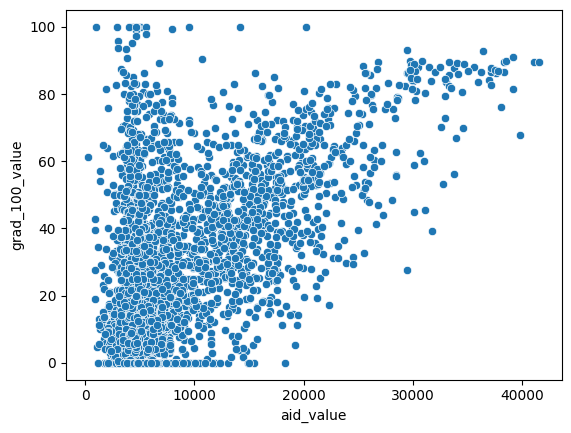

In [22]:
var1 = 'aid_value'
var2 = 'grad_100_value'

#scatterplot of aid value x grad 100 value
sns.scatterplot(data=df, x=var1,y=var2)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

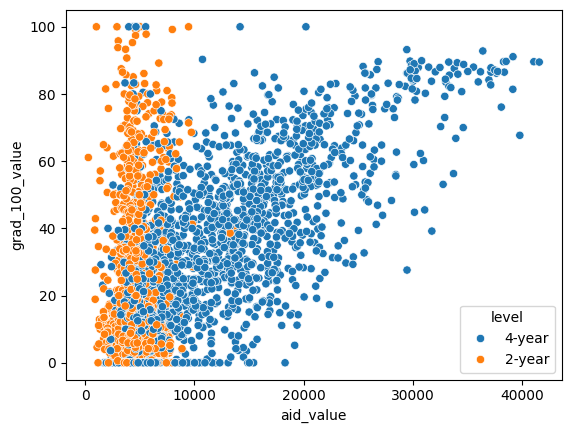

In [23]:
group = 'level'

#scatterplot of aid value x grad 100 value with grouping by level
sns.scatterplot(data=df, x=var1,y=var2, hue = group)

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

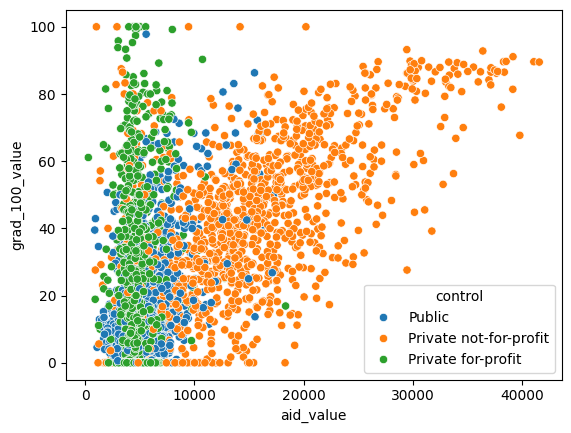

In [24]:
group = 'control'

#scatterplot of aid value x grad 100 value with grouping by control
sns.scatterplot(data=df, x=var1,y=var2, hue = group)

*For the first scatterplot without grouping, there is a wide range of aid_value across institutions. There is a concentration of points at the lower end of aid value and graduation rates. As aid_value increases, there is slight upward trend in grad_100_value, indicating a potential positive correlation between the amount of aid provided and graduation rates. Beyond a certain point, the graduation rates appear to plateau suggesting that the relationship between aid and graduation rates may not be linear or may be influenced by other factors.*

*For scatterplot 2: The blue dots representing 4-year institutions are generally distributed higher on the y-axis, suggesting these institutions tend to have higher graduation rates. There's a concentration of 2-year institutions (orange dots) primarily in the lower aid value range with varying graduation rates, though some do reach higher graduation rates.*

*For scatterplot 3: Public institutions (green dots) are clustered at the lower end of the aid value scale and mostly exhibit a moderate range of graduation rates. Private not-for-profit institutions (orange dots) span a wider range of aid values and show a broad distribution of graduation rates, with several reaching higher graduation rates. Private for-profit institutions (blue dots) are somewhat dispersed but tend to cluster towards the lower to middle range of both aid values and graduation rates.*

*Private not-for-profit institutions stand out as having a potential positive correlation between the amount of aid received and higher graduation rates.*

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data

*I chose the dataset on Medicaid Spending by Drug found here: https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-medicaid-spending-by-drug/medicaid-spending-by-drug*

3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

*The data dictionary provides definitions for each variable and it includes information on the methodology used to calculate these values. It does not include how missing values should be handled for both categorical and missing values though. There is a variable called "outlier_flag" which is set to “1” when records are substantially impacted by outliers. This allows users to identify and potentially exclude these points from their analysis, if they would be considered missing values. Overall, while the dictionary offers clear variable definitions, it lacks comprehensive information on missing data treatment, which is crucial for proper data analysis and interpretation.*

4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

*I selected these variables (specifically pertaining to year 2021): Gnrc_Name(Generic Name), Tot_Spndng_2021(Total Spending 2021), and Tot_Dsg_Unts_2021(Total Dosage Units 2021).*

*When these variables are analyzed together, they can show the relationship between the consumption of medications and their financial impact on healthcare systems. An example of this would be, one could investigate whether higher spending on medication is due to higher prices or larger quantities dispensed, or how the mix of brand-name versus generic drugs affects overall healthcare spending.*

In [114]:

df = pd.read_csv("./data/DSD_MCD_RY22_P06_V20_D21_BGM.csv")

In [115]:
#cleaning generic name
name = df["Gnrc_Name"]
print("Pre-cleaning:")
print(name.value_counts())

print(name.unique() , '\n') #doesnt print out all names


unique_names = name.unique() #Solution try to print out all into a text file to take a closer look at

with open('unique_brand_names.txt', 'w') as f:
    for name in unique_names:
        f.write("%s\n" % name)


Pre-cleaning:
Gnrc_Name
Methylphenidate HCl               75
Metformin HCl                     71
Lamotrigine                       67
Levonorgestrel/Ethin.Estradiol    67
Levetiracetam                     66
                                  ..
FVIII Rec,B-Dom Delet PEG-Aucl     2
Cabazitaxel                        2
Empagliflozin                      2
Sitagliptin Phosphate              2
Olanzapine Pamoate                 2
Name: count, Length: 2464, dtype: int64
['Acetaminophen' 'Vitamins A And D' 'Vits A And D/White Pet/Lanolin' ...
 'Tobramycin/Lotepred Etab' 'Pitavastatin Magnesium' 'Olanzapine Pamoate'] 



In [116]:
#Taking a look at the generic names some cleaning: 
#Removing special characters and standardize separators for combined generic names 
df["Gnrc_Name"] = df["Gnrc_Name"].str.replace('*', '') #need to use str or else it will replace the whole string
df["Gnrc_Name"] = df["Gnrc_Name"].str.replace('/', ' and ')

#standardizing abbreviations for vitamins and hydrochloride
df["Gnrc_Name"] = df["Gnrc_Name"].str.replace('Vits', 'Vitamins')
df["Gnrc_Name"] = df["Gnrc_Name"].str.replace('HCl', 'Hydrochloride')

print(df["Gnrc_Name"].value_counts()) #count is still the same which is what is wanted



Gnrc_Name
Methylphenidate Hydrochloride         75
Metformin Hydrochloride               71
Lamotrigine                           67
Levonorgestrel and Ethin.Estradiol    67
Levetiracetam                         66
                                      ..
FVIII Rec,B-Dom Delet PEG-Aucl         2
Cabazitaxel                            2
Empagliflozin                          2
Sitagliptin Phosphate                  2
Olanzapine Pamoate                     2
Name: count, Length: 2464, dtype: int64


In [121]:
#Cleaning Tot_Spndng_2021(Total Spending 2021)
spending = df['Tot_Spndng_2021']
spending.unique #so the type is a float which is desired for numerical variables

<bound method Series.unique of 0           331.69
1           331.69
2           253.76
3           253.76
4           106.45
           ...    
16141     22141.27
16142    108270.21
16143     67237.88
16144     17779.03
16145     23253.30
Name: Tot_Spndng_2021, Length: 16146, dtype: float64>

In [122]:
print('Total missing: ', sum(spending.isnull() ) )
#no missing units and the variable type is already correct

Total missing:  0


In [125]:
#Cleaning Tot_Dsg_Unts_2021(Total Dosage Units 2021)
dosage = df['Tot_Dsg_Unts_2021']
dosage.unique #so the type is a float which is desired for numerical variables

<bound method Series.unique of 0          4642.000
1          4642.000
2          9136.000
3          9136.000
4          1032.708
            ...    
16141      2133.000
16142    555519.000
16143    364907.000
16144    107844.000
16145     82768.000
Name: Tot_Dsg_Unts_2021, Length: 16146, dtype: float64>

In [126]:
print('Total missing: ', sum(spending.isnull() ) )
#no missing units and the variable type is already correct

Total missing:  0


5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?



<Axes: xlabel='None'>

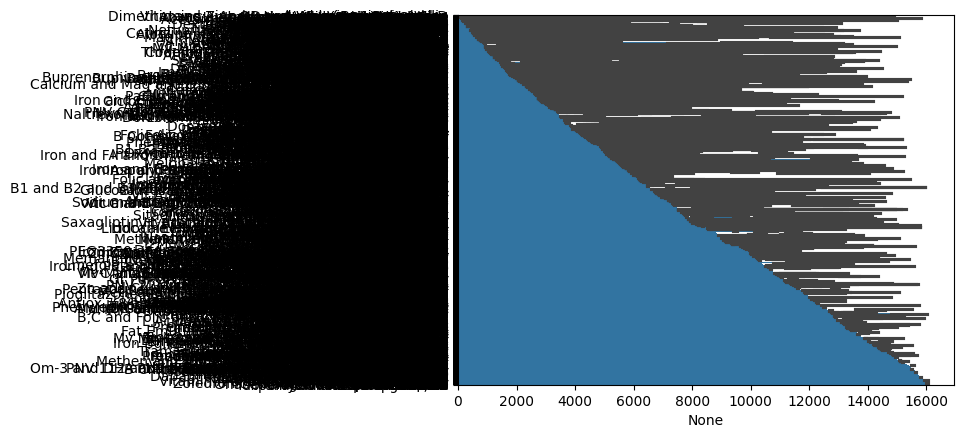

In [117]:
#bar graph for generic name
sns.barplot(data = df, x=df["Gnrc_Name"].index, y =df["Gnrc_Name"].values)

*Due to the large number of values for the variable generic name it is hard to determine an outlier from this single graph*

<Axes: ylabel='Tot_Spndng_2021'>

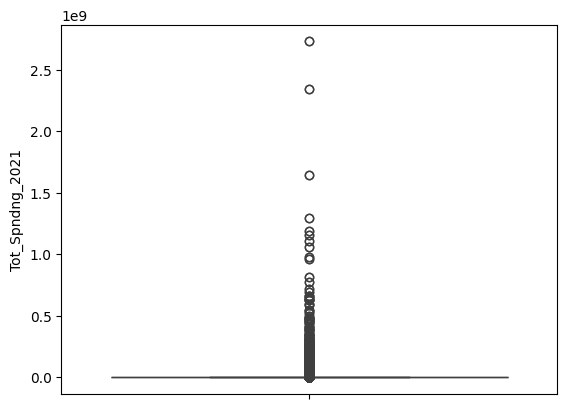

In [127]:
#boxplot for Tot_Spndng_2021(Total Spending 2021)
var = 'Tot_Spndng_2021'
sns.boxplot(df[var])

*There are a few data points that lie above the rest of the distribution which could be considered outliers, I would say the points above the values of 1.5 are significant outliers.*

<Axes: ylabel='Tot_Dsg_Unts_2021'>

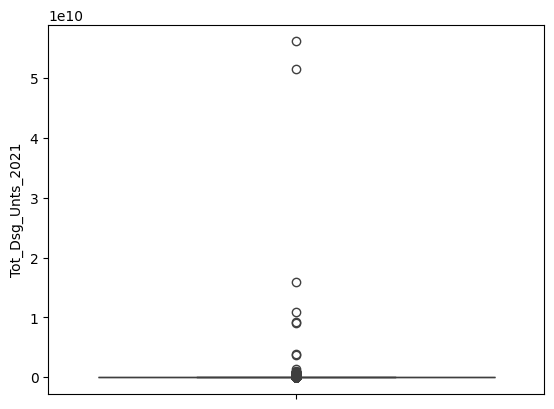

In [128]:
#boxplot for Tot_Dsg_Unts_2021(Total Dosage Units 2021)
var = 'Tot_Dsg_Unts_2021'
sns.boxplot(df[var])

*In this box plot the outlier points are the ones at the value of 5 and higher as they are far from the rest of the distribution in the box plot.*

6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 


<Axes: xlabel='Tot_Spndng_2021', ylabel='Density'>

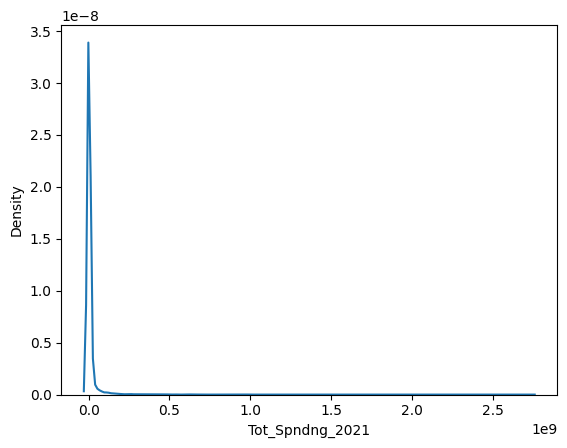

In [131]:
#kernel density plot for Tot_Spndng_2021(Total Spending 2021)
var = 'Tot_Spndng_2021'
sns.kdeplot(df[var])

C:\Users\rdinh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='spending_log', ylabel='Density'>

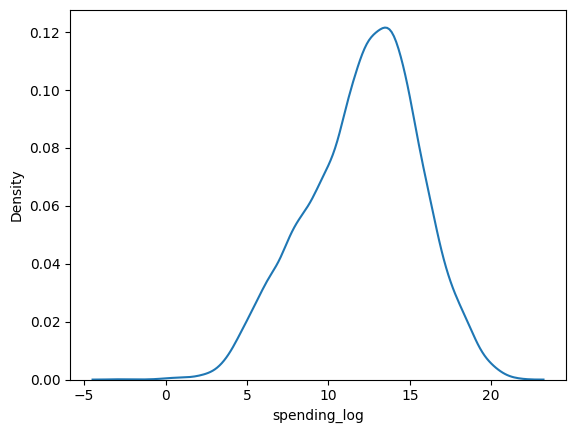

In [132]:
#using log to transform the data for better visualization
df['spending_log'] = np.log(df[var])

#kernel density plot of spending_log
sns.kdeplot(data=df, x=df['spending_log'])

*The original distribution of Tot_Spndng_2021 is heavily skewed to the right. I transformed the data with log as it was heavily skewed to the right to better visualize the data. The KDP has a more symmetrical distribution with its peak at the log value of around 13.*

<Axes: xlabel='Tot_Dsg_Unts_2021', ylabel='Density'>

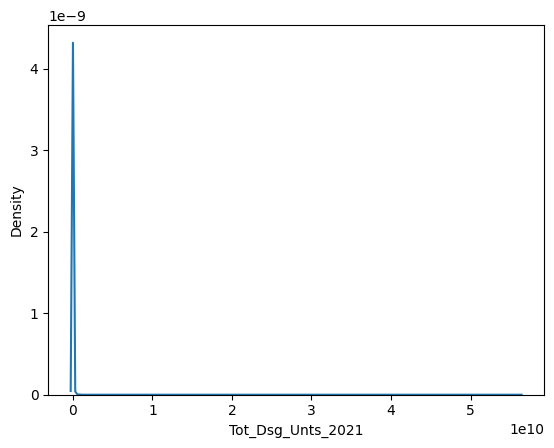

In [134]:
#kernel density plot for Tot_Dsg_Unts_2021(Total Dosage Units 2021)
var = 'Tot_Dsg_Unts_2021'
sns.kdeplot(df[var])

<Axes: xlabel='dosage_log', ylabel='Density'>

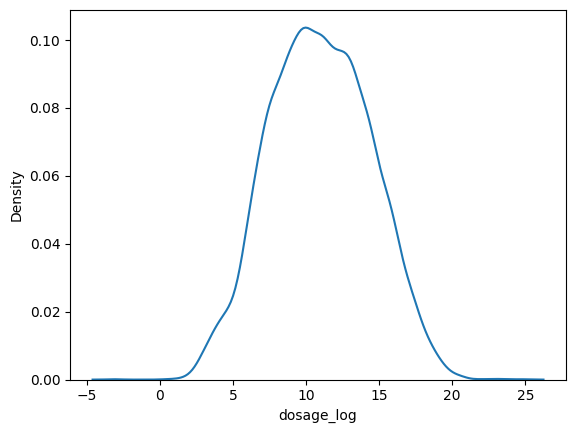

In [135]:
#using log to transform the data for better visualization
df['dosage_log'] = np.log(df[var])

#kernel density plot of dosage_log
sns.kdeplot(data=df, x=df['dosage_log'])

*For total dosage, I had to perform the same log transformation on the variable as the original kernel density plot was skewed heavily to the right. The graph shows a bell-shaped curve suggesting that while most drugs have a moderate level of dosage units when transformed on a log scale, there are drugs on both extremes with very low and very high dosage units compared to the median.*

7. Create a scatter plot, and describe the relationship you see.

<Axes: xlabel='Tot_Spndng_2021', ylabel='Tot_Dsg_Unts_2021'>

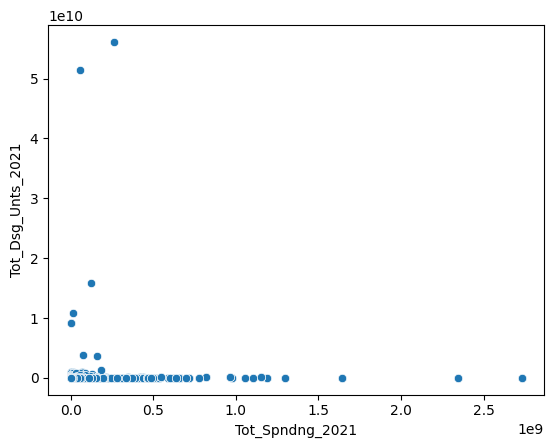

In [136]:
var1 = 'Tot_Spndng_2021'
var2 = 'Tot_Dsg_Unts_2021'

#scatterplot of'Tot_Dsg_Unts_2021' x 'Tot_Spndng_2021'
sns.scatterplot(data=df, x=var1,y=var2)

*There is not a strong linear relationship between these two variables. Most of the data is clustered near the origin, indicating that for many drugs both total spending and dosage units are low in 2021. However, there are a few data points with very high values for either total spending or dosage units, or both, which would be considered outliers in the dataset.*

8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [137]:
#total spending
var = 'Tot_Spndng_2021'
group = 'Gnrc_Name'
df.loc[:,[group,var]].groupby(group).describe()

Tot_Spndng_2021  \
                                                             count   
Gnrc_Name                                                            
0.9 % Sodium Chloride                                         12.0   
A and C and E and Zinc and Sod Selenate and Copper             2.0   
Aa 4.25 % and Calcium and Lytes and D5W                        2.0   
Aa 4.25% and Calcium and Lytes and Dex 10%                     2.0   
Aa 5 % and Calcium and Lytes and Dext 20 %                     2.0   
...                                                            ...   
Zoledronic Acid                                               21.0   
Zoledronic Acid and Mannitol-Water                            13.0   
Zolmitriptan                                                  22.0   
Zolpidem Tartrate                                             27.0   
Zonisamide                                                    16.0   

                                                                  \
                                                            mean   
Gnrc_Name                                                          
0.9 % Sodium Chloride                               4.361912e+07   
A and C and E and Zinc and Sod Selenate and Copper  6.239980e+03   
Aa 4.25 % and Calcium and Lytes and D5W             1.193769e+04   
Aa 4.25% and Calcium and Lytes and Dex 10%          4.937080e+03   
Aa 5 % and Calcium and Lytes and Dext 20 %          8.382341e+04   
...                                                          ...   
Zoledronic Acid                                     2.734067e+05   
Zoledronic Acid and Mannitol-Water                  1.675194e+05   
Zolmitriptan                                        7.302288e+05   
Zolpidem Tartrate                                   1.122840e+06   
Zonisamide                                          1.763356e+06   

                                                                            \
                                                             std       min   
Gnrc_Name                                                                    
0.9 % Sodium Chloride                               8.220417e+07    504.14   
A and C and E and Zinc and Sod Selenate and Copper  0.000000e+00   6239.98   
Aa 4.25 % and Calcium and Lytes and D5W             0.000000e+00  11937.69   
Aa 4.25% and Calcium and Lytes and Dex 10%          0.000000e+00   4937.08   
Aa 5 % and Calcium and Lytes and Dext 20 %          0.000000e+00  83823.41   
...                                                          ...       ...   
Zoledronic Acid                                     5.538529e+05    771.75   
Zoledronic Acid and Mannitol-Water                  2.629343e+05   2789.39   
Zolmitriptan                                        1.422675e+06    243.24   
Zolpidem Tartrate                                   2.332330e+06    289.63   
Zonisamide                                          3.863323e+06    148.12   

                                                                             \
                                                           25%          50%   
Gnrc_Name                                                                     
0.9 % Sodium Chloride                               35479.7975  2805157.510   
A and C and E and Zinc and Sod Selenate and Copper   6239.9800     6239.980   
Aa 4.25 % and Calcium and Lytes and D5W             11937.6900    11937.690   
Aa 4.25% and Calcium and Lytes and Dex 10%           4937.0800     4937.080   
Aa 5 % and Calcium and Lytes and Dext 20 %          83823.4100    83823.410   
...                                                        ...          ...   
Zoledronic Acid                                     33583.9000    83666.180   
Zoledronic Acid and Mannitol-Water                   4639.8200    94313.200   
Zolmitriptan                                         6800.4100    36040.185   
Zolpidem Tartrate                                   88259.7300   414289.740 

In [139]:
#total dosage
var = 'Tot_Dsg_Unts_2021'
group = 'Gnrc_Name'
df.loc[:,[group,var]].groupby(group).describe()

Tot_Dsg_Unts_2021  \
                                                               count   
Gnrc_Name                                                              
0.9 % Sodium Chloride                                           12.0   
A and C and E and Zinc and Sod Selenate and Copper               2.0   
Aa 4.25 % and Calcium and Lytes and D5W                          2.0   
Aa 4.25% and Calcium and Lytes and Dex 10%                       2.0   
Aa 5 % and Calcium and Lytes and Dext 20 %                       2.0   
...                                                              ...   
Zoledronic Acid                                                 21.0   
Zoledronic Acid and Mannitol-Water                              13.0   
Zolmitriptan                                                    22.0   
Zolpidem Tartrate                                               27.0   
Zonisamide                                                      16.0   

                                                                  \
                                                            mean   
Gnrc_Name                                                          
0.9 % Sodium Chloride                               9.358389e+09   
A and C and E and Zinc and Sod Selenate and Copper  3.163400e+04   
Aa 4.25 % and Calcium and Lytes and D5W             2.099240e+05   
Aa 4.25% and Calcium and Lytes and Dex 10%          1.360000e+05   
Aa 5 % and Calcium and Lytes and Dext 20 %          1.703659e+06   
...                                                          ...   
Zoledronic Acid                                     1.171416e+04   
Zoledronic Acid and Mannitol-Water                  1.179328e+05   
Zolmitriptan                                        2.798746e+04   
Zolpidem Tartrate                                   4.189621e+06   
Zonisamide                                          5.648371e+06   

                                                                               \
                                                             std          min   
Gnrc_Name                                                                       
0.9 % Sodium Chloride                               2.081317e+10      473.000   
A and C and E and Zinc and Sod Selenate and Copper  0.000000e+00    31634.000   
Aa 4.25 % and Calcium and Lytes and D5W             0.000000e+00   209924.000   
Aa 4.25% and Calcium and Lytes and Dex 10%          0.000000e+00   136000.000   
Aa 5 % and Calcium and Lytes and Dext 20 %          0.000000e+00  1703659.299   
...                                                          ...          ...   
Zoledronic Acid                                     2.621772e+04       85.000   
Zoledronic Acid and Mannitol-Water                  1.917551e+05     2824.000   
Zolmitriptan                                        4.771660e+04       81.000   
Zolpidem Tartrate                                   1.151407e+07      357.000   
Zonisamide                                          1.207640e+07      690.000   

                                                                               \
                                                            25%           50%   
Gnrc_Name                                                                       
0.9 % Sodium Chloride                                542193.750  3.564193e+07   
A and C and E and Zinc and Sod Selenate and Copper    31634.000  3.163400e+04   
Aa 4.25 % and Calcium and Lytes and D5W              209924.000  2.099240e+05   
Aa 4.25% and Calcium and Lytes and Dex 10%           136000.000  1.360000e+05   
Aa 5 % and Calcium and Lytes and Dext 20 %          1703659.299  1.703659e+06   
...                                                         ...           ...   
Zoledronic Acid                                         639.750  2.397250e+03   
Zoledronic Acid and Mannitol-Water                     6950.000  5.993350e+04   
Zolmitriptan                                            351.750

*Solely focusing on the generic drug names outputted in the tables:*

*The drugs listed vary significantly in both spending and dosage units. For example, "0.9 % Sodium Chloride" has a high mean spending and an extremely large mean number of dosage units, indicating it is a widely used medication with significant aggregate spending. Other drugs, like "Zonisamide," show a high mean spending as well, which could suggest either a high cost per unit or a large volume of usage, or even both.*

*For some drugs, the count is low (example: "A and C and E and Zinc and Sod Selenate and Copper" has only 2 records), which means the mean value is based on a small sample and may not be representative of broader usage patterns.*

*Some drugs have a very high maximum value compared to their 75th percentile, this may indicate outliers which could significantly affect the mean.*